In [12]:
pip install numpy pandas scikit-learn matplotlib

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [14]:
# Datos (kilometraje, año, transmision, combustible, dueño) 

carros = pd.read_csv('Train_ultimo1.csv', encoding='latin-1')

km_ = carros["km_impulsado"]
año_ = carros["Año"]
transmision_ = carros["transmission"]
dueño_ = carros["Dueño"]
precio_ = carros["precio_de_venta"]

carros




,Año,precio_de_venta,km_impulsado,combustible,transmission,Dueño
0,2007,60000,70000,1,2,1
1,2007,135000,50000,1,2,1
2,2012,600000,100000,2,2,1
3,2017,250000,46000,1,2,1
4,2014,450000,141000,2,2,2
...,...,...,...,...,...,...
12441,2013,320000,110000,1,2,1
12442,2007,135000,119000,2,2,4
12443,2009,382000,120000,2,2,1
12444,2013,290000,25000,2,2,1


In [15]:
# Datos (kilometraje, año, transmision, combustible, dueño) 
# combustible [Petrol=1, Diesel=2, CNG=3, LPG=4, Electric=5]; transmision [Automatic=1, Manual=2]

carros_data = {
    'km': km_, 
    'año': año_, 
    'transmision': transmision_, 
    'dueño': dueño_, 
    'Precio': precio_
}

# [Alt]+[Shift] cambia el idioma del teclado


Intercepto (β0): -103204056.73405515
Coeficiente (kilometraje, β1): 0.06863739491386717
Coeficiente (año, β2): 52629.03200492638
Coeficiente (transmision, β3): -1142190.691157205
Coeficiente (dueño, β4): -23797.95566993444


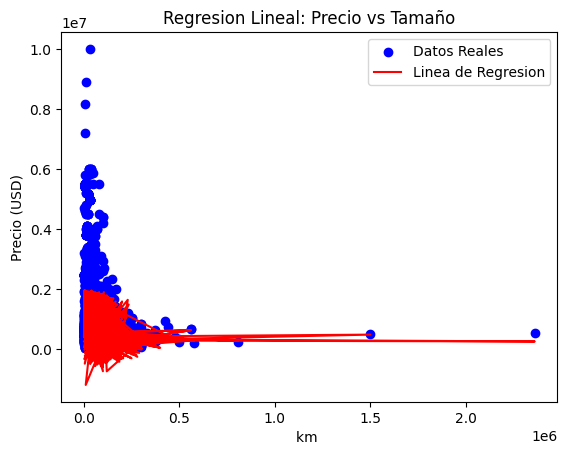

In [16]:
# Convertir los datos en un DataFrame
df = pd.DataFrame(carros_data)

# Variables independientes (kilometraje, año, transmision, combustible) y dependiente (Precio)
X = df[['km', 'año', 'transmision', 'dueño']]
Y = df['Precio']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos 
modelo.fit(X,Y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1, beta_2, beta_3, beta_4 = modelo.coef_  # Pendientes (kilometraje, año, transmision, combustible)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (kilometraje, β1): {beta_1}")
print(f"Coeficiente (año, β2): {beta_2}")
print(f"Coeficiente (transmision, β3): {beta_3}")
print(f"Coeficiente (dueño, β4): {beta_4}") 

# visualizar la regresion (opcional para datos simples)
plt.scatter(df['km'], Y, color='blue', label='Datos Reales')
plt.plot(df['km'], modelo.predict(X), color='red', label='Linea de Regresion')
plt.title('Regresion Lineal: Precio vs Tamaño')
plt.xlabel('km ')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

In [22]:
test = pd.read_csv('TEST_ultimo.csv', encoding='latin-1')

t_km = test["km_impulsado"]
t_año = test["Año"]
t_transmision = test["transmission"]
t_dueño = test["Dueño"]
t_precio = test["precio_de_venta"]

test


,precio_de_venta,Año,km_impulsado,combustible,transmission,Dueño
0,505000,2017,87150,1.0,2,1
1,450000,2014,75000,2.0,2,2
2,220000,2011,67000,1.0,2,1
3,799000,2019,37500,1.0,2,1
4,1950000,2018,69000,2.0,2,1
...,...,...,...,...,...,...
2033,850000,2016,90300,2.0,2,1
2034,275000,2014,83000,1.0,2,2
2035,240000,2013,73000,1.0,2,1
2036,4290000,2018,60474,2.0,1,1


In [28]:
# Predecir precios para dos nuevos valores


nuevo_X = np.array([t_km, t_año, t_transmision, t_dueño]).T  # La transpuesta (.T) organiza como columnas

predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones



print("\nPredicciones:")
for i, pred in enumerate(predicciones):
   print(f"Predicción {i+1} para (kilometraje: {nuevo_X[i][0]}), (Modelo: {nuevo_X[i][1]}), (Transmision: {nuevo_X[i][2]}), (Dueño: {nuevo_X[i][3]}): precio {pred:.2f}")


Predicciones:
Predicción 1 para (kilometraje: 87150), (Modelo: 2017), (Transmision: 2), (Dueño: 1): precio 646503.23
Predicción 2 para (kilometraje: 75000), (Modelo: 2014), (Transmision: 2), (Dueño: 2): precio 463984.23
Predicción 3 para (kilometraje: 67000), (Modelo: 2011), (Transmision: 2), (Dueño: 1): precio 329346.00
Predicción 4 para (kilometraje: 37500), (Modelo: 2019), (Transmision: 2), (Dueño: 1): precio 748353.45
Predicción 5 para (kilometraje: 69000), (Modelo: 2018), (Transmision: 2), (Dueño: 1): precio 697886.49
Predicción 6 para (kilometraje: 73315), (Modelo: 2017), (Transmision: 2), (Dueño: 1): precio 645553.63
Predicción 7 para (kilometraje: 47000), (Modelo: 2015), (Transmision: 1), (Dueño: 2): precio 1656882.11
Predicción 8 para (kilometraje: 75000), (Modelo: 2017), (Transmision: 1), (Dueño: 2): precio 1764062.02
Predicción 9 para (kilometraje: 56000), (Modelo: 2017), (Transmision: 1), (Dueño: 1): precio 1786555.87
Predicción 10 para (kilometraje: 85000), (Modelo: 2015)

c:\Users\jessi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df[['km', 'año', 'transmision', 'dueño']]
Y = df['Precio']

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, Y)

# Realizar predicciones en los datos de entrenamiento
predicciones = model.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(Y, predicciones)  # Coeficiente de determinación R²
mae = mean_absolute_error(Y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(Y, predicciones)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.4155070938420825
Error Absoluto Medio (MAE): 288358.03966084635
